In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm


In [3]:

RAW_IMAGE_DIR = r'C:\Users\HP\Downloads\Datasets_Assessment\Datasets\Raw_Images'  # Folder with original .tiff images
OUTPUT_DIR = r'C:\Users\HP\Downloads\Datasets_Assessment\Datasets\YOLO1'           # Folder to save the tiles
TILE_SIZE = 1024                      # Tile size (square)
STRIDE = 1024                         # Overlap if needed (e.g., 512 for 50% overlap)

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [5]:
# Appling percentile-based contrast stretching to 16-bit grayscale image.
# CONVERTING IN 8 BIT GRAY SCALE FOR YOLO
def contrast_stretch(img):
    vmin = np.percentile(img, 1)
    vmax = np.percentile(img, 99)
    img_clipped = np.clip(img, vmin, vmax)
    img_stretched = ((img_clipped - vmin) / (vmax - vmin + 1e-5) * 255).astype(np.uint8)
    return img_stretched


In [7]:
#Tile a single image into smaller patches.
# Image dimension: 4418 x 4418 pixels - PERFECTLY TILED INTO 1024 = ((4418/1024)^2) = 16  , 16 * 35 = 560 IMAGES 

def tile_image(image, tile_size, stride, base_name):
    h, w = image.shape
    tile_id = 0
    for y in range(0, h, stride):
        for x in range(0, w, stride):
            if y + tile_size > h or x + tile_size > w:
                continue  

            tile = image[y:y + tile_size, x:x + tile_size]
            tile_filename = f"{base_name}_tile_{tile_id}.jpg"
            tile_path = os.path.join(OUTPUT_DIR, tile_filename)
            cv2.imwrite(tile_path, tile)
            tile_id += 1

In [9]:

for filename in tqdm(os.listdir(RAW_IMAGE_DIR)):
    if not filename.lower().endswith('.tiff'):
        continue

    path = os.path.join(RAW_IMAGE_DIR, filename)
    img_16bit = cv2.imread(path, cv2.IMREAD_UNCHANGED)

    if img_16bit is None:
        print(f"Failed to load: {filename}")
        continue

    img_8bit = contrast_stretch(img_16bit)
    base_name = os.path.splitext(filename)[0]
    tile_image(img_8bit, TILE_SIZE, STRIDE, base_name)

print("done")

100%|██████████| 35/35 [00:27<00:00,  1.28it/s]

done


In [1]:
from ultralytics import YOLO


model = YOLO("yolo11l.pt")  


model.train(data=r"C:\Users\HP\Downloads\digantara2\data.yaml", epochs=100, imgsz=84, batch=32)

New https://pypi.org/project/ultralytics/8.3.131 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.70  Python-3.11.7 torch-2.5.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=C:\Users\HP\Downloads\digantara2\data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=84, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

train: Scanning C:\Users\HP\Downloads\digantara2\train\labels.cache... 392 images, 71 backgrounds, 0 corrupt: 100%|██████████| 392/392 [00:00<?, ?it/s]
val: Scanning C:\Users\HP\Downloads\digantara2\valid\labels.cache... 124 images, 22 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to runs\detect\train24\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 96 train, 96 val
Using 0 dataloader workers
Logging results to runs\detect\train24
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.875      6.642     0.8835         31         96: 100%|██████████| 13/13 [00:20<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all        124        275      0.617     0.0264     0.0238    0.00447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      4.064      3.026     0.9335         18         96: 100%|██████████| 13/13 [00:18<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        124        275      0.617     0.0264     0.0238    0.00447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      4.117      1.971     0.9265         25         96: 100%|██████████| 13/13 [00:17<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        124        275      0.617     0.0264     0.0238    0.00447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      3.688      1.912     0.9009         14         96: 100%|██████████| 13/13 [00:17<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        124        275      0.617     0.0264     0.0238    0.00447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G       3.65      1.772     0.8386         26         96: 100%|██████████| 13/13 [00:17<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        124        275      0.617     0.0264     0.0238    0.00447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      3.649      1.679      0.893         17         96: 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        124        275   0.000104     0.0132   5.48e-05   1.17e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      3.593      1.923     0.8726         19         96: 100%|██████████| 13/13 [00:17<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        124        275   0.000104     0.0132   5.48e-05   1.17e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      3.595       1.91     0.8869         24         96: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        124        275    1.5e-05    0.00189   7.59e-06   1.52e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      3.568      1.952     0.8958          8         96: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        124        275    1.5e-05    0.00189   7.59e-06   1.52e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      3.482      1.664     0.8876         14         96: 100%|██████████| 13/13 [00:17<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        124        275    1.5e-05    0.00189   7.59e-06   1.52e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      3.428      1.922     0.8927         21         96: 100%|██████████| 13/13 [00:17<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        124        275    1.5e-05    0.00189   7.59e-06   1.52e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      3.535      1.685     0.8605         23         96: 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275    1.5e-05    0.00189   7.59e-06   1.52e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      3.416        1.8     0.8713          7         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        124        275    1.5e-05    0.00189   7.59e-06   1.52e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G       3.39      1.743     0.8607         23         96: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275     0.0251     0.0642     0.0151    0.00343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      3.435      1.605     0.8659         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.768     0.0906     0.0936     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      3.263      1.664     0.8631         31         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.721      0.083     0.0598     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      3.323      1.754     0.8463         27         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.721      0.083     0.0598     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      3.282      1.637     0.8335         19         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.721      0.083     0.0598     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      3.208      1.675     0.8315         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.721      0.083     0.0598     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      3.233      1.515      0.846         19         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        124        275     0.0509      0.104     0.0178    0.00469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      3.275      1.652     0.8408         17         96: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.171      0.153     0.0799     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G       3.34       1.65     0.8458         29         96: 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.731      0.164      0.127     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      3.047        1.6     0.8649          9         96: 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        124        275      0.773      0.108      0.114     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      3.218      1.868     0.8651         19         96: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        124        275      0.766      0.183      0.174     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      3.134      1.648     0.8226         19         96: 100%|██████████| 13/13 [00:17<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        124        275      0.816      0.178       0.19     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      3.101      1.489     0.8454         12         96: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.743      0.168      0.132     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      3.054      1.494      0.836         24         96: 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        124        275      0.794      0.183      0.188     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      2.962      1.569     0.8413         25         96: 100%|██████████| 13/13 [00:18<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.748      0.117      0.117     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      3.033      1.652     0.8265         23         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        124        275      0.736      0.162      0.151     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      3.075      1.543     0.8389         14         96: 100%|██████████| 13/13 [00:17<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.832      0.215      0.219     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      2.881      1.538     0.8178         23         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        124        275      0.825      0.199      0.205     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      2.864      1.392     0.8288         22         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.754      0.172      0.161     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      3.039      1.679     0.8309          9         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.766      0.185      0.177     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      2.986       1.52     0.8295         16         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.832      0.183      0.213     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      3.134      1.537     0.8427         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.804       0.15      0.176     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      3.021      1.472     0.8434         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.763      0.134      0.144     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G       3.09      1.669     0.8299         18         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.788      0.157       0.15     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      2.987      1.538     0.8393         26         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.776       0.17      0.157     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      2.912      1.531     0.8241         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.789      0.179      0.173     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      2.983      1.571     0.7966         26         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275       0.76      0.113      0.109     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      2.892       1.54     0.8105         17         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        124        275      0.749      0.104     0.0997     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      2.905      1.536     0.8249         15         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        124        275      0.774      0.225      0.206     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      2.896      1.423     0.8152         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.794      0.191      0.203     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      2.827      1.584     0.8281         19         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.866      0.158      0.203     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      3.043      1.472     0.8391         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        124        275      0.835      0.185      0.214     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      2.966      1.473     0.8436         23         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.779      0.142      0.165     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      2.977      1.443     0.8182         24         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.727      0.125      0.134     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G       2.86      1.482     0.7967         30         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275     0.0937     0.0983     0.0248    0.00618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      2.864      1.461     0.8311         16         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        124        275      0.519     0.0509    0.00624    0.00183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      2.793      1.431      0.832         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.597     0.0528     0.0185    0.00418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      2.879       1.45     0.8398         18         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275     0.0482     0.0472    0.00805    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      2.922      1.474     0.8295         16         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275     0.0123     0.0679     0.0042    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      2.847      1.521     0.8143         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275    0.00981      0.104    0.00476     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      2.815      1.455     0.8291         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275     0.0388      0.106     0.0176    0.00482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      2.797      1.417     0.8206         12         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.609      0.106     0.0425     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      2.875      1.451     0.8242         29         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.665     0.0849     0.0631     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      2.784      1.351      0.816         16         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.817      0.106      0.107     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      2.822      1.584     0.8192         24         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.807      0.125      0.133     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      2.738       1.57     0.7858         14         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.738       0.16      0.142      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G       2.76      1.465     0.8109         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.791      0.187       0.19     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      2.712      1.391     0.8358         15         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        124        275      0.796        0.2      0.241     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      2.781      1.404     0.8145         22         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.799     0.0981     0.0995     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      2.782      1.581       0.79         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        124        275      0.779      0.126      0.103     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      2.634      1.398     0.7963         18         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.747     0.0925     0.0731     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      2.639       1.34     0.8209         12         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275       0.77      0.144      0.117     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      2.631      1.346     0.8148         18         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.839      0.206      0.206     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      2.758      1.417     0.8211         13         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.779      0.175      0.177     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      2.726      1.401      0.807         28         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.765      0.177      0.158     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      2.543      1.236     0.8066         24         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        124        275      0.751      0.137      0.109     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      2.678       1.49     0.8109         17         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        124        275       0.75      0.083     0.0845     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      2.606      1.404     0.7953         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.671      0.145      0.114     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      2.769       1.55     0.8254         17         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.636      0.174      0.128     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      2.611      1.339     0.7977         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.816      0.174      0.157     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      2.638      1.529     0.8112         14         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        124        275      0.778      0.119      0.124      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      2.569      1.339     0.8063         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.705     0.0836     0.0632     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G       2.58      1.274      0.811         19         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.745      0.106     0.0907      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G       2.52      1.341     0.8039         28         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.855      0.187       0.19     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      2.558      1.214     0.8119         10         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.737      0.109      0.088     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      2.583       1.34     0.7952         38         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275       0.73      0.111     0.0816     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      2.739      1.612     0.8202         16         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275       0.76      0.121      0.124       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G       2.51      1.276     0.8116         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        124        275       0.82       0.14      0.156     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      2.673      1.403     0.8076         19         96: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.835      0.191      0.176       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      2.663      1.378     0.8175         20         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.797      0.149      0.137     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      2.601      1.342       0.81         10         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        124        275      0.785      0.145      0.126     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      2.504      1.281     0.8207         17         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275      0.749      0.121      0.117     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      2.641      1.357     0.8063         21         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.754      0.106      0.117     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      2.548      1.343     0.8139         26         96: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.758      0.123      0.125     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      2.587      1.304     0.7963         22         96: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        124        275       0.73      0.111     0.0987     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      2.372      1.216     0.8181         11         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        124        275      0.735     0.0943     0.0855     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      2.463      1.415     0.8025         22         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.713      0.102     0.0788     0.0213


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      2.657      1.353     0.8358         18         96: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.774      0.145      0.128     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      2.406      1.211     0.8148         10         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        124        275      0.808      0.185      0.178     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      2.463      1.244     0.8288         14         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        124        275      0.849      0.194      0.198     0.0571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      2.554      1.342     0.8367         12         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        124        275      0.783      0.123      0.106     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      2.301       1.25     0.8224         13         96: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        124        275       0.76     0.0943     0.0915      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      2.505      1.202     0.8363         11         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275      0.768      0.104      0.102     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      2.459       1.23     0.8193         14         96: 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        124        275        0.8      0.136      0.136     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      2.472       1.24     0.8367         15         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.816      0.152      0.155     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      2.349      1.203     0.8097         15         96: 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        124        275      0.823      0.155      0.162     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G      2.332      1.153      0.819          8         96: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        124        275      0.826      0.157      0.165     0.0437



100 epochs completed in 0.584 hours.
Optimizer stripped from runs\detect\train24\weights\last.pt, 51.1MB
Optimizer stripped from runs\detect\train24\weights\best.pt, 51.1MB

Validating runs\detect\train24\weights\best.pt...
Ultralytics 8.3.70  Python-3.11.7 torch-2.5.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLO11l summary (fused): 464 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


                   all        124        275      0.797      0.201      0.241     0.0615
                  Line         10         10          1          0      0.102     0.0102
                 Stars        101        265      0.594      0.403      0.381      0.113
Speed: 0.1ms preprocess, 16.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train24


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000273EE0DD210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0


image 1/1 C:\Users\HP\Downloads\digantara2\test\images\Raw_Observation_030_Set3_tile_5_jpg.rf.b85dd937886bea100a19845326ef455c.jpg: 96x96 5 Starss, 55.1ms
Speed: 0.0ms preprocess, 55.1ms inference, 0.0ms postprocess per image at shape (1, 3, 96, 96)


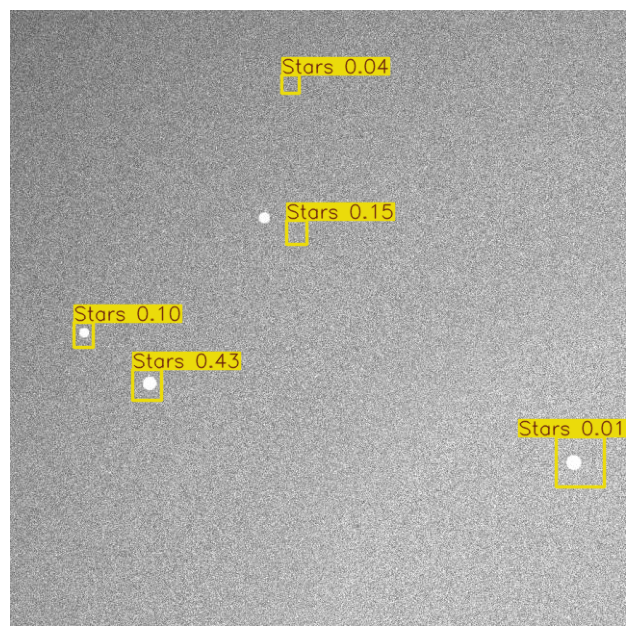

In [17]:

import matplotlib.pyplot as plt

# Load model
model = YOLO(r"C:\Users\HP\Desktop\Machine learning\runs\detect\train24\weights\best.pt")

# Run inference
results = model(r"C:\Users\HP\Downloads\digantara2\test\images\Raw_Observation_030_Set3_tile_5_jpg.rf.b85dd937886bea100a19845326ef455c.jpg", conf=0.01)


plt.figure(figsize=(12, 8))
plt.imshow(result_image)
plt.axis("off")
plt.show()
